In [23]:
import os
import pandas as pd
import tarfile
import urllib.request

In [16]:
DATA_DIR = "./LamaH-CE"
if not os.path.isdir(DATA_DIR):
    print("Downloading LamaH-CE from Zenodo...")
    DATA_URL = "https://zenodo.org/record/5153305/files/1_LamaH-CE_daily_hourly.tar.gz"
    filename, _ = urllib.request.urlretrieve(DATA_URL)
    archive = tarfile.open(filename)
    archive.extractall(DATA_DIR)
    archive.close()
else:
    print("Found LamaH-CE locally!")

Found LamaH-CE locally!


## Inspect edge index

In [45]:
stream_dist = pd.read_csv(DATA_DIR + "/B_basins_intermediate_all/1_attributes/Stream_dist.csv", sep=";")
stream_dist.describe()

,ID,NEXTDOWNID,dist_hdn,elev_diff,strm_slope
count,834.000000,834.000000,834.000000,834.000000,834.000000
mean,442.245803,442.046763,24.614508,105.936451,6.406835
std,257.326985,250.689975,21.626291,153.150498,12.361263
min,1.000000,1.000000,0.500000,1.000000,0.200000
25%,216.250000,225.500000,10.900000,28.000000,1.500000
50%,448.500000,450.500000,18.600000,56.000000,3.200000
75%,666.750000,646.000000,31.275000,115.000000,6.275000
max,882.000000,881.000000,139.600000,1196.000000,170.200000


In [64]:
def collect_upstream(id):
    predecessors = list(stream_dist[stream_dist["NEXTDOWNID"] == id]["ID"])
    if len(predecessors) == 0:
        return []
    else:
        return predecessors + sum((collect_upstream(pred) for pred in predecessors), [])

In [80]:
for i in range(882):
    if 100 >= len(collect_upstream(i)) >= 90:
        print(i, "is good")

613 is good


In [94]:
sub_network = collect_upstream(1)
print(sub_network)

[806, 807, 808, 809, 798, 799, 805, 797, 800, 803, 804, 802, 801]


## Inspect gauge attributes

In [81]:
gauge_attrs = pd.read_csv(DATA_DIR + "/D_gauges/1_attributes/Gauge_attributes.csv", sep=";")
gauge_attrs.describe()

,ID,govnr,area_gov,elev,lon,lat,obsbeg_day,obsbeg_hr,obsend,gaps_pre,gaps_post,area_ratio,nrs_rivat,diur_art,diur_glac
count,882.000000,8.820000e+02,882.000000,882.000000,8.820000e+02,8.820000e+02,882.000000,882.000000,882.000000,882.000000,882.000000,859.000000,8.400000e+02,882.000000,882.000000
mean,441.500000,2.261528e+06,1851.400113,549.044218,4.574692e+06,2.754777e+06,1984.241497,1982.045351,29.675737,3.452885,3.447870,1.002376,2.043163e+07,0.164399,0.051020
std,254.755765,5.253531e+06,9672.329495,321.692508,1.719941e+05,8.587514e+04,7.128587,11.311109,242.765553,38.260469,38.256654,0.026419,2.124136e+04,0.370848,0.220164
min,1.000000,1.050000e+02,0.000000,122.000000,4.192433e+06,2.596838e+06,1981.000000,1951.000000,0.000000,0.000000,0.000000,0.890000,2.037155e+07,0.000000,0.000000
25%,221.250000,2.018695e+05,72.250000,348.000000,4.440438e+06,2.685863e+06,1981.000000,1976.000000,0.000000,0.000000,0.000000,0.995000,2.041818e+07,0.000000,0.000000
50%,441.500000,2.077290e+05,173.350000,477.000000,4.590460e+06,2.752362e+06,1981.000000,1977.000000,0.000000,0.000000,0.000000,1.000000,2.043220e+07,0.000000,0.000000
75%,661.750000,2.123488e+05,560.350000,650.750000,4.721607e+06,2.805987e+06,1982.000000,1988.000000,0.000000,0.007500,0.000000,1.006000,2.044900e+07,0.000000,0.000000
max,882.000000,1.914521e+07,131384.000000,2640.000000,4.917967e+06,3.021806e+06,2016.000000,2016.000000,2019.000000,980.071000,979.967000,1.340000,2.047002e+07,1.000000,1.000000


### Check if subnetwork contains gauges with missing data

In [95]:
set(gauge_attrs[gauge_attrs['gaps_post']  > 0]["ID"]).intersection(sub_network)

set()

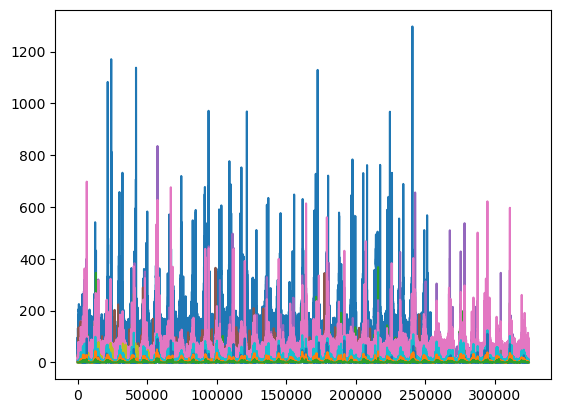

In [101]:
for i in sub_network:
    discharge_i = pd.read_csv(DATA_DIR + f"/D_gauges/2_timeseries/hourly/ID_{i}.csv", sep=";")
    discharge_i["qobs"].plot()


In [ ]:
for id in range(1, 882 + 1):
    discharge_i = pd.read_csv(DATA_DIR + "/D_gauges/2_timeseries/hourly/ID_1.csv", sep=";")

## Inspect concrete timeseries

In [19]:
df = pd.read_csv(DATA_DIR + "/D_gauges/2_timeseries/hourly/ID_1.csv", sep=";")

In [97]:
df["YYYY"].max()

2017

In [29]:
df[-10:]

,YYYY,MM,DD,hh,mm,qobs,ckhs,qceq,qcol
192854,2017,12,31,14,0,64.2,1,0,0
192855,2017,12,31,15,0,64.0,1,0,0
192856,2017,12,31,16,0,65.2,1,0,0
192857,2017,12,31,17,0,63.6,1,0,0
192858,2017,12,31,18,0,61.9,1,0,0
192859,2017,12,31,19,0,61.7,1,0,0
192860,2017,12,31,20,0,60.8,1,0,0
192861,2017,12,31,21,0,57.5,1,0,0
192862,2017,12,31,22,0,55.7,1,0,0
192863,2017,12,31,23,0,63.1,1,0,0


In [25]:
192864 / (60 * 60 * 24)

2.232222222222222

<AxesSubplot: >

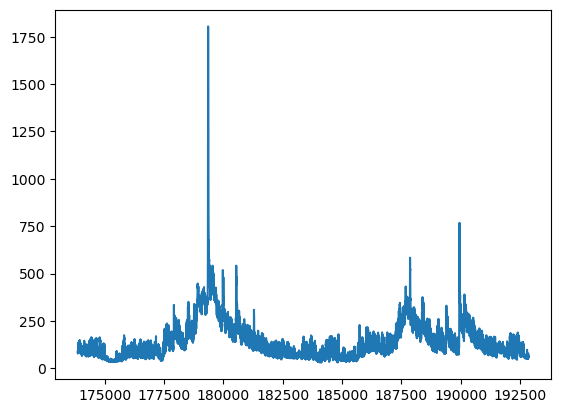

In [28]:
df["qobs"][-19000:].plot()

<AxesSubplot: xlabel='YYYY'>

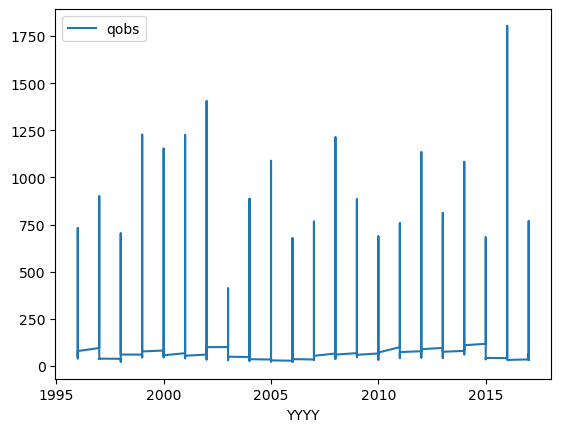

In [26]:
df.plot(x="YYYY", y="qobs")